# Semantic Function Associations

In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'semantics'
)

out2 = Exporter(
    paths['outdir'], 
    'functheads'
)

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'lex_str',
       'pdp_str', 'head_utf8', 'funct_type', 'function', 'quality', 'name',
       'text', 'n_times', 'n_slots', 'lex_token', 'is_advb', 'tense', 'firstw',
       'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela', 'cl_type',
       'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform',
       'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'unmodified', 'modtag', 'modtag2',
       'front', 'ph_type', 'has_time', 'notes', 'main_genre', 'APPO', 'DEF',
       'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'reg_group', 'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [3]:
df.shape

(3648, 81)

In [4]:
main_df = df[df.funct_type == 'main']

# Modifier Tendencies by Function

## Simultaneous

In [5]:
simdf = main_df[main_df.function == 'simultaneous']

In [6]:
simmod_ct = pivot_ct(
    simdf,
    'ph_type',
    'modtag',
)

simmod_ct = simmod_ct.loc[['PP', 'NP']]
simmod_ct = simmod_ct.loc[:,(simmod_ct.sum() > 10)] # limit to min 10 observations

out.table(
    simmod_ct,
    'simmod_ct',
    caption='Modifer Counts for Simultaneous PP and NP',
    adjustbox=True,
)

modtag,DEF,DEMON,C,ORDN,PL+C,PL+DEMON,PL+SFX,SFX,NUM,DEF+PL
ph_type,,,,,,,,,,
PP,214,320,212,146,45,40,29,28,18,22
NP,216,30,2,0,0,0,0,1,4,0


In [7]:
simmod_pr = simmod_ct.div(simmod_ct.sum(1), 0)
simmod_pc = simmod_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    simmod_pc,
    'simmod_pc',
    caption='Modifer Percentages of Simultaneous PP and NP',
    adjustbox=True
)

modtag,DEF,DEMON,C,ORDN,PL+C,PL+DEMON,PL+SFX,SFX,NUM,DEF+PL
ph_type,,,,,,,,,,
PP,20%,30%,20%,14%,4%,4%,3%,3%,2%,2%
NP,85%,12%,1%,0%,0%,0%,0%,0%,2%,0%


In [8]:
out.number(
    simmod_pr.loc['NP']['DEF']*100,
    'simmod_NP_DEF_pc'
)

'85'

In [9]:
# ! Uncomment for examples of all SIM NP modifiiers

# # extract examples
# for phtype in simmod_pc.index:
#     print(phtype)
#     for mod in simmod_pc.loc[phtype].index:
#         exdata = simdf[
#             (simdf.ph_type == phtype)
#             & (simdf.modtag == mod)
#         ]
#         if exdata.shape[0]:
#             print(mod)
#             display(ts.show(exdata, spread=5, extra=['modtag']))
            
#     print('-'*50)

# Automatic Export Modification Data

In [10]:
functs = ['anterior', 'posterior', 'anterior_dur', 'posterior_dur', 'atelic_ext']

funct2name = {
    'anterior_dur': 'anterior durative',
    'posterior_dur': 'posterior durative',
    'atelic_ext': 'atelic extent'
}
funct2abbrev = {'anterior': 'ant', 'posterior': 'post', 
             'anterior_dur': 'antdur', 'posterior_dur':'postdur',
                'atelic_ext': 'atelext'
               }

functdata = {}

for f in functs:
    
    fdata = main_df[main_df.function == f]
    mod_ct = fdata.modtag2.value_counts()
    mod_pr = mod_ct / mod_ct.sum()
    mod_cp = join_ct_pr(mod_ct, mod_pr)
    functdata[f] = {
        'df': fdata,
        'mod_ct': mod_ct,
        'mod_pr': mod_pr,
        'mod_cp': mod_cp,
    }
    
    nicename = funct2name.get(f, f).title()
    abbrev = funct2abbrev[f]
    tablename = f'{abbrev}_mod_cp'
    print(tablename)
    display(
        out.table(
            mod_cp,
            tablename,
            caption=f'Modifier Frequencies for {nicename} Function'
        )
    )

ant_mod_cp


,count,percent
Ø,20,62%
SFX,9,28%
KL,1,3%
PL+DEMON,1,3%
DEF,1,3%


post_mod_cp


,count,percent
Ø,111,50%
SFX,40,18%
C,15,7%
NUM+PL,15,7%
PL+DEMON,12,5%
NUM,9,4%
PL,5,2%
DEF,4,2%
PL+QUANT,3,1%
KL,2,1%


antdur_mod_cp


,count,percent
Ø,253,60%
DEMON,69,16%
DEF,62,15%
C,24,6%
NUM,4,1%
PL+C,4,1%
ORDN,3,1%
PL+DEMON,2,0%
PL,2,0%
QUANT+DEF,1,0%


postdur_mod_cp


,count,percent
Ø,33,58%
PL+C,10,18%
PL+SFX,5,9%
DEF,4,7%
DEMON,3,5%
NUM,1,2%
ORDN,1,2%


atelext_mod_cp


,count,percent
NUM+PL,162,30%
NUM,117,21%
Ø,60,11%
KL+DEF,55,10%
KL+PL+C,39,7%
KL+DEF+PL,39,7%
PL+QUANT,21,4%
KL+PL+SFX,16,3%
PL,11,2%
C,6,1%


# Manual Extraction

## Posterior Durative

In [11]:
postdurdf = functdata['posterior_dur']['df']

pivot_ct(
    postdurdf,
    'head_utf8',
    'modtag2',
)

modtag2,Ø,PL+C,PL+SFX,DEF,DEMON,NUM,ORDN
head_utf8,,,,,,,
יום,1,9,1,2,2,1,1
עולם,7,0,0,2,0,0,0
אז,7,0,0,0,0,0,0
בטן,4,0,0,0,0,0,0
נעורים,0,0,4,0,0,0,0
ראשׁ,4,0,0,0,0,0,0
עתה,2,0,0,0,0,0,0
קדם,2,0,0,0,0,0,0
רחוק,2,0,0,0,0,0,0


In [12]:
ts.show(
    postdurdf[postdurdf.head_utf8=='יום']
, extra=['modtag2'])

showing 18 of 18


,verse,clause,modtag2
node,,,
461161,1_Kings 1:6,וְלֹֽא־עֲצָבֹ֨ו אָבִ֤יו מִיָּמָיו֙,PL+SFX
462241,1_Kings 8:16,מִן־הַיֹּ֗ום לֹֽא־בָחַ֣רְתִּי בְעִ֗יר מִכֹּל֙ שִׁבְטֵ֣י יִשְׂרָאֵ֔ל,DEF
471018,Isaiah 37:26,אֹותָ֣הּ עָשִׂ֔יתִי מִ֥ימֵי קֶ֖דֶם,PL+C
471677,Isaiah 43:13,גַּם־מִיֹּום֙ אֲנִ֣י ה֔וּא,nan
485535,Ezekiel 48:35,וְשֵׁם־הָעִ֥יר מִיֹּ֖ום,Ø
486120,Hosea 10:9,מִימֵי֙ הַגִּבְעָ֔ה חָטָ֖אתָ,PL+C
488181,Nahum 2:9,וְנִינְוֵ֥ה כִבְרֵֽכַת־מַ֖יִם מִ֣ימֵי הִ֑יא,PL+C
488926,Haggai 2:19,מִן־הַיֹּ֥ום הַזֶּ֖ה אֲבָרֵֽךְ׃ ס,DEMON
490132,Malachi 3:7,לְמִימֵ֨י אֲבֹתֵיכֶ֜ם סַרְתֶּ֤ם מֵֽחֻקַּי֙,PL+C


## Atelic Extent

In [13]:
ateldf = functdata['atelic_ext']['df']

atelmods = functdata['atelic_ext']['mod_pr'].mul(100).round()

out.number(
    atelmods[atelmods.index.str.match('.*PL')].sum(),
    'atelext_NUM_PC'
)

'53'

In [14]:
out.number(
    atelmods['Ø'],
    'atelext_Ø_PC'
)

'11'

In [15]:
ts.show(
    ateldf[ateldf.modtag2 == 'Ø']
)

showing 25 of 60


,verse,clause
node,,
434994,Exodus 13:21,יֹומָ֜ם בְּעַמּ֤וּד עָנָן֙
435000,Exodus 13:22,וְעַמּ֥וּד הָאֵ֖שׁ לָ֑יְלָה לִפְנֵ֖י הָעָֽם׃ פ
436514,Exodus 28:29,וְנָשָׂ֣א אַ֠הֲרֹן אֶת־שְׁמֹ֨ות בְּנֵֽי־יִשְׂרָאֵ֜ל בְּחֹ֧שֶׁן הַמִּשְׁפָּ֛ט עַל־לִבֹּ֖ו לְזִכָּרֹ֥ן לִפְנֵֽי־יְהוָ֖ה תָּמִֽיד׃
437864,Exodus 40:38,כִּי֩ עֲנַ֨ן יְהוָ֤ה עַֽל־הַמִּשְׁכָּן֙ יֹומָ֔ם
441887,Numbers 9:16,כֵּ֚ן יִהְיֶ֣ה תָמִ֔יד
442408,Numbers 14:14,וּבְעַמֻּ֣ד עָנָ֗ן אַתָּ֨ה הֹלֵ֤ךְ לִפְנֵיהֶם֙ יֹומָ֔ם
444992,Deuteronomy 1:33,הַהֹלֵ֨ךְ לִפְנֵיכֶ֜ם בַּדֶּ֗רֶךְ בָּאֵ֣שׁ׀ לַ֗יְלָה
458858,2_Samuel 9:10,וּמְפִיבֹ֨שֶׁת֙ בֶּן־אֲדֹנֶ֔יךָ יֹאכַ֥ל תָּמִ֛יד לֶ֖חֶם עַל־שֻׁלְחָנִ֑י
460697,2_Samuel 21:10,וְלֹֽא־נָתְנָה֩ עֹ֨וף הַשָּׁמַ֜יִם וְאֶת־חַיַּ֥ת הַשָּׂדֶ֖ה לָֽיְלָה׃


# Head Word associations by Function + front

In [16]:
headfunctf_ct = pivot_ct(
    main_df,
    ['function', 'front'],
    ['head_utf8']
)

headfunctf_dp = sig.apply_deltaP(headfunctf_ct, 0, 1)
headfunctf_pr = headfunctf_ct.div(headfunctf_ct.sum(1), 0)

headfunctf_ct.head()

head_utf8           יום  עתה  שׁנה  עולם  עת  לילה  בקר  ערב  אז  אחר  ...  \
function     front                                                     ...   
simultaneous ב      554    0    99     0  96    48   78   18   0    0  ...   
atelic_ext   Ø      285    0   161    11   0    26    0    0   0    0  ...   
simultaneous עתה      0  349     0     0   0     0    0    0   0    0  ...   
             Ø      227    0     2     0   2    52    3    0   0    0  ...   
anterior_dur עד      87    2     9    54   7     2   19   43   0    0  ...   

head_utf8           יובל  יצקה  כברה  כון  כסא  מגפה  מעים  עילום  עשׂרים  \
function     front                                                          
simultaneous ב         0     1     1    0    1     0     0      0       1   
atelic_ext   Ø         0     0     0    0    0     0     0      0       0   
simultaneous עתה       0     0     0    0    0     0     0      0       0   
             Ø         0     0     0    0    0     0     0      0       0   
anterior_dur עד        0     0     0    1    0     0     0      0       0   

head_utf8           תשׁע  
function     front        
simultaneous ב         1  
atelic_ext   Ø         0  
simultaneous עתה       0  
             Ø         0  
anterior_dur עד        0  

[5 rows x 101 columns]

# Auto-export head count tables

In [17]:
functdata = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'], 
}

In [18]:
getfronts = {
    'simultaneous': [
        'Ø', 
        'ב',
        'ל',
    ],
    'atelic_ext': [
        'Ø',
    ],
    'posterior': [
        'אחר', 
        'מן',
        'מן+קץ',
        'מן+קצה'
    ],
    'posterior_dur': [
        'מן',
    ]
}

name2cpd = {}

for function in functdata:
    
    if function == 'reg_recur':
        continue
    
    ab, nicename = functdata[function]
    data_ct = headfunctf_ct.loc[idx[function, :], :]
    data_ct = data_ct.droplevel('function')
    data_pr = headfunctf_pr.loc[idx[function, :], :]
    data_pr = data_pr.droplevel('function')
    data_dp = headfunctf_dp.loc[idx[function, :], :]
    data_dp = data_dp.droplevel('function')
    fronts = getfronts.get(function, data_ct.index)
    
    print(function)
    
    for front in fronts:
        front_ct = data_ct.loc[front].sort_values(ascending=False)
        front_ct = front_ct[front_ct > 0].head(15)        
        front_pr = data_pr.loc[front][front_ct.index]
        front_dp = data_dp.loc[front][front_ct.index].round(2).values
        front_cp = join_ct_pr(front_ct, front_pr)
        front_cp['ΔP'] = front_dp
        front_cp = front_cp.rename_axis(index='time word')
        
        tablename = f'{ab}{front}_head_cpd'
        print(tablename)
        name2cpd[tablename] = front_cp
        display(
            out2.table(
                front_cp,
                tablename,
                caption=f'Time Word Collocations with {nicename} ({front})',
            )
        )
        print()

    print('-'*20)

simultaneous
simØ_head_cpd


,count,percent,ΔP
time word,,,
יום,227,77%,0.43
לילה,52,18%,0.15
בקר,3,1%,-0.03
שׁנה,2,1%,-0.09
עת,2,1%,-0.04
רגע,2,1%,0.00
צהרים,1,0%,-0.00
שׁביעי,1,0%,0.00
שׁבוע,1,0%,0.00



simב_head_cpd


,count,percent,ΔP
time word,,,
יום,554,55%,0.24
שׁנה,99,10%,0.01
עת,96,9%,0.07
בקר,78,8%,0.06
לילה,48,5%,0.01
חדשׁ,21,2%,0.01
ערב,18,2%,-0.01
צהרים,11,1%,0.01
ראשׁון,10,1%,0.01



simל_head_cpd


,count,percent,ΔP
time word,,,
עת,10,23%,0.19
יום,8,19%,-0.20
מועד,7,16%,0.16
תשׁובה,3,7%,0.07
ערב,3,7%,0.05
מחר,3,7%,0.06
מחרת,2,5%,0.04
תקופה,2,5%,0.05
אחרית,1,2%,0.02



--------------------
anterior_dur
antdurעד_head_cpd


,count,percent,ΔP
time word,,,
יום,87,30%,-0.09
עולם,54,18%,0.14
ערב,43,15%,0.14
מתי,23,8%,0.08
בקר,19,7%,0.03
אן,13,4%,0.04
שׁנה,9,3%,-0.07
עת,7,2%,-0.02
הנה,6,2%,0.02



antdurל_head_cpd


,count,percent,ΔP
time word,,,
עולם,107,69%,0.67
נצח,24,16%,0.16
עד,11,7%,0.07
דור,9,6%,0.06
בקר,1,1%,-0.03
מועד,1,1%,0.00
עילום,1,1%,0.01



antdurעד+ל_head_cpd


,count,percent,ΔP
time word,,,
עולם,2,67%,0.61
מנחה,1,33%,0.33



--------------------
anterior
antל+פנה_head_cpd


,count,percent,ΔP
time word,,,
פנה,19,70%,0.70
מות,4,15%,0.14
יום,1,4%,-0.35
שׁבת,1,4%,0.04
שׁמשׁ,1,4%,0.04
חציר,1,4%,0.04



antטרם_head_cpd


,count,percent,ΔP
time word,,,
טרם,4,100%,1.0



antל+פנה+מן_head_cpd


,count,percent,ΔP
time word,,,
זה,1,100%,1.0



--------------------
atelic_ext
atelØ_head_cpd


,count,percent,ΔP
time word,,,
יום,285,54%,0.19
שׁנה,161,31%,0.26
לילה,26,5%,0.01
חדשׁ,19,4%,0.02
יומם,15,3%,0.02
עולם,11,2%,-0.04
ירח,3,1%,0.01
שׁבוע,2,0%,0.00
שׁלשׁ,1,0%,0.00



--------------------
posterior
postאחר_head_cpd


,count,percent,ΔP
time word,,,
אחר,67,42%,0.42
כן,49,30%,0.30
מות,14,9%,0.08
דבר,14,9%,0.09
זאת,3,2%,0.02
טהרה,2,1%,0.01
מבול,2,1%,0.01
מגפה,1,1%,0.01
אבימלך,1,1%,0.01



postמן_head_cpd


,count,percent,ΔP
time word,,,
מחרת,21,66%,0.66
יום,6,19%,-0.20
עתה,2,6%,-0.04
שׁנה,1,3%,-0.06
עת,1,3%,-0.01
קצת,1,3%,0.03



postמן+קץ_head_cpd


,count,percent,ΔP
time word,,,
שׁנה,9,50%,0.41
יום,8,44%,0.06
חדשׁ,1,6%,0.04



postמן+קצה_head_cpd


,count,percent,ΔP
time word,,,
יום,4,40%,0.02
שׁנה,4,40%,0.31
חדשׁ,2,20%,0.18



--------------------
posterior_dur
postdurמן_head_cpd


,count,percent,ΔP
time word,,,
יום,17,27%,-0.12
עולם,9,14%,0.09
אז,8,12%,0.11
תמול,7,11%,0.11
נעורים,4,6%,0.06
ראשׁ,4,6%,0.06
בטן,4,6%,0.06
רחוק,2,3%,0.03
קדם,2,3%,0.03



--------------------
telic_ext
telicב_head_cpd


,count,percent,ΔP
time word,,,
יום,5,62%,0.24
שׁנה,3,38%,0.28



telicØ_head_cpd


,count,percent,ΔP
time word,,,
יום,4,67%,0.28
שׁנה,2,33%,0.24



--------------------
dist_fut
distfutב_head_cpd


,count,percent,ΔP
time word,,,
יום,4,67%,0.28
שׁנה,1,17%,0.07
חדשׁ,1,17%,0.15



distfutØ_head_cpd


,count,percent,ΔP
time word,,,
יום,1,100%,0.62



--------------------
dist_past
distpastØ_head_cpd


,count,percent,ΔP
time word,,,
תמול,2,67%,0.66
אתמול,1,33%,0.33



--------------------


In [19]:
# N lexemes associated with simultaneous location

out.number(
    df[df.function == 'simultaneous'].head_utf8.unique().shape[0],
    'N_timewords_simul'
)

'60'

In [20]:
# N lexemes associated with simultaneous location

out.number(
    df[df.function == 'atelic_ext'].head_utf8.unique().shape[0],
    'N_timewords_atel'
)



'13'

## Handle Regular Recurrence

In [21]:
reg_df = df[df.function == 'reg_recur']

regrechead_ct = pivot_ct(
    reg_df,
    'reg_group',
    'head_utf8'
)

regrechead_pr = regrechead_ct.div(regrechead_ct.sum(1), 0)
regrechead_pc = regrechead_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    regrechead_ct,
    'regrechead_ct',
    caption='Time Word Collocations by Regular Recurrence Pattern',
)

head_utf8,יום,בקר,עת,שׁנה,שׁבת,חדשׁ,לילה,ערב,חג,רגע
reg_group,,,,,,,,,,
ל.זמן,11,5,2,0,0,1,0,1,0,1
ב.כל.זמן,4,0,10,2,0,0,2,0,0,0
ב.זמן.ב.זמן,1,13,0,0,1,0,0,1,1,0
זמן.ב.זמן,2,0,0,6,1,2,0,0,0,0
זמן.זמן,7,0,0,1,0,0,0,0,0,0
ל.זמן.ל.זמן,0,1,0,0,2,0,0,0,0,0
בין.זמן,1,0,0,0,0,0,0,0,0,0
זמן.על.זמן,1,0,0,0,0,0,0,0,0,0


In [22]:
out.number(
    regrechead_ct[[
        'יום',
        'בקר',
        'שׁנה',
        'חדשׁ',
        'לילה',
        'ערב',
    ]].sum().sum() / regrechead_ct.sum().sum()*100,
    'regrechead_canon_pc'
)

'78'

In [23]:
out.table(
    regrechead_pc,
    'regrechead_pc',
    caption='Time Word Percentage of Regular Recurrence Patterns',
)

head_utf8,יום,בקר,עת,שׁנה,שׁבת,חדשׁ,לילה,ערב,חג,רגע
reg_group,,,,,,,,,,
ל.זמן,52%,24%,10%,0%,0%,5%,0%,5%,0%,5%
ב.כל.זמן,22%,0%,56%,11%,0%,0%,11%,0%,0%,0%
ב.זמן.ב.זמן,6%,76%,0%,0%,6%,0%,0%,6%,6%,0%
זמן.ב.זמן,18%,0%,0%,55%,9%,18%,0%,0%,0%,0%
זמן.זמן,88%,0%,0%,12%,0%,0%,0%,0%,0%,0%
ל.זמן.ל.זמן,0%,33%,0%,0%,67%,0%,0%,0%,0%,0%
בין.זמן,100%,0%,0%,0%,0%,0%,0%,0%,0%,0%
זמן.על.זמן,100%,0%,0%,0%,0%,0%,0%,0%,0%,0%


# Manual Data Extraction

## Simultaneous

In [24]:
out.number(
    name2cpd['simØ_head_cpd'].loc['שׁנה']['ΔP']*-100,
    'simØ_year_dp',
)

'9'

## Anterior Durative

In [25]:
# ex of <WLM without ant. dur; to show the difference with those that have obscured ends
ts.show(
    main_df[
        (main_df.function == 'atelic_ext')
         & (main_df.head_utf8 == 'עולם')
    ]
)

showing 11 of 11


,verse,clause
node,,
473547,Isaiah 64:4,וַֽנֶּחֱטָ֔א בָּהֶ֥ם עֹולָ֖ם
492502,Psalms 48:15,כִּ֤י זֶ֨ה׀ אֱלֹהִ֣ים אֱ֭לֹהֵינוּ עֹולָ֣ם וָעֶ֑ד
492722,Psalms 52:10,בָּטַ֥חְתִּי בְחֶֽסֶד־אֱ֝לֹהִ֗ים עֹולָ֥ם וָעֶֽד׃
493111,Psalms 61:5,אָג֣וּרָה בְ֭אָהָלְךָ עֹולָמִ֑ים
493119,Psalms 61:8,יֵשֵׁ֣ב עֹ֭ולָם לִפְנֵ֣י אֱלֹהִ֑ים
493291,Psalms 66:7,מֹ֘שֵׁ֤ל בִּגְבוּרָתֹ֨ו׀ עֹולָ֗ם
494629,Psalms 89:2,חַֽסְדֵ֣י יְ֭הוָה עֹולָ֣ם אָשִׁ֑ירָה
494632,Psalms 89:3,עֹ֭ולָם חֶ֣סֶד יִבָּנֶ֑ה
494717,Psalms 89:38,כְּ֭יָרֵחַ יִכֹּ֣ון עֹולָ֑ם


## Posterior Durative

In [26]:
out.number(
    name2cpd['postdurמן_head_cpd'].loc['עולם']['ΔP']*100,
    'postמן_forever_dp'
)

'9'

In [27]:
out.number(
    name2cpd['postdurמן_head_cpd'].loc['אז']['ΔP']*100,
    'postמן_then_dp'
)

'11'

In [28]:
# ex of <WLM without ant. dur; to show the difference with those that have obscured ends
ts.show(
    main_df[
        (main_df.function == 'posterior_dur')
         & (main_df.head_utf8 == 'בטן')
    ]
)

showing 4 of 4


,verse,clause
node,,
472051,Isaiah 46:3,הַֽעֲמֻסִים֙ מִנִּי־בֶ֔טֶן
472234,Isaiah 48:8,וּמִבֶּ֖טֶן קֹ֥רָא לָֽךְ׃
472305,Isaiah 49:1,יְהוָה֙ מִבֶּ֣טֶן קְרָאָ֔נִי
472321,Isaiah 49:5,יֹצְרִ֤י מִבֶּ֨טֶן֙ לְעֶ֣בֶד לֹ֔ו


In [29]:
# ex of <WLM without ant. dur; to show the difference with those that have obscured ends
ts.show(
    main_df[
        (main_df.function == 'posterior_dur')
         & (main_df.head_utf8 == 'מעים')
    ]
)

showing 1 of 1


,verse,clause
node,,
472306,Isaiah 49:1,מִמְּעֵ֥י אִמִּ֖י הִזְכִּ֥יר שְׁמִֽי׃


In [30]:
# ex of <WLM without ant. dur; to show the difference with those that have obscured ends
ts.show(
    main_df[
        (main_df.function == 'posterior_dur')
         & (main_df.head_utf8 == 'רחם')
    ]
)

showing 1 of 1


,verse,clause
node,,
472052,Isaiah 46:3,הַנְּשֻׂאִ֖ים מִנִּי־רָֽחַם׃


In [31]:
# ex of <WLM without ant. dur; to show the difference with those that have obscured ends
ts.show(
    main_df[
        (main_df.function == 'posterior_dur')
         & (main_df.head_utf8 == 'נעורים')
    ]
)

showing 4 of 4


,verse,clause
node,,
456059,1_Samuel 17:33,וְה֛וּא אִ֥ישׁ מִלְחָמָ֖ה מִנְּעֻרָֽיו׃ ס
463764,1_Kings 18:12,וְעַבְדְּךָ֛ יָרֵ֥א אֶת־יְהוָ֖ה מִנְּעֻרָֽי׃
472167,Isaiah 47:12,בַּאֲשֶׁ֥ר יָגַ֖עַתְּ מִנְּעוּרָ֑יִךְ
472187,Isaiah 47:15,סֹחֲרַ֣יִךְ מִנְּעוּרַ֗יִךְ


## Regular Recurrence

In [32]:
ts.show(
    reg_df[
        (reg_df.head_utf8 == 'עת')
        & (reg_df.reg_group == 'ל.זמן')
    ]
)

showing 2 of 2


,verse,clause
node,,
509525,Nehemiah 10:35,לְ֠הָבִיא לְבֵ֨ית אֱלֹהֵ֧ינוּ לְבֵית־אֲבֹתֵ֛ינוּ לְעִתִּ֥ים מְזֻמָּנִ֖ים שָׁנָ֣ה בְשָׁנָ֑ה
510885,1_Chronicles 12:23,כִּ֚י לְעֶת־יֹ֣ום בְּיֹ֔ום יָבֹ֥אוּ עַל־דָּוִ֖יד עַד־לְמַחֲנֶ֥ה גָדֹ֖ול כְּמַחֲנֵ֥ה אֱלֹהִֽים׃ פ


In [33]:
ts.show(
    reg_df[
        (reg_df.head_utf8 == 'יום')
        & (reg_df.reg_group == 'ל.זמן')
    ]
)

showing 11 of 11


,verse,clause
node,,
436675,Exodus 29:36,וּפַ֨ר חַטָּ֜את תַּעֲשֶׂ֤ה לַיֹּום֙ עַל־הַכִּפֻּרִ֔ים
436687,Exodus 29:38,כְּבָשִׂ֧ים בְּנֵֽי־שָׁנָ֛ה שְׁנַ֥יִם לַיֹּ֖ום תָּמִֽיד׃
444059,Numbers 28:3,כְּבָשִׂ֨ים בְּנֵֽי־שָׁנָ֧ה תְמִימִ֛ם שְׁנַ֥יִם לַיֹּ֖ום עֹלָ֥ה תָמִֽיד׃
461798,1_Kings 5:2,וַיְהִ֥י לֶֽחֶם־שְׁלֹמֹ֖ה לְיֹ֣ום אֶחָ֑ד שְׁלֹשִׁ֥ים כֹּר֙ סֹ֔לֶת וְשִׁשִּׁ֥ים כֹּ֖ר קָֽמַח׃
478156,Jeremiah 37:21,וְנָתֹן֩ לֹ֨ו כִכַּר־לֶ֤חֶם לַיֹּום֙ מִח֣וּץ הָאֹפִ֔ים
485216,Ezekiel 45:23,וְחַטָּ֕את שְׂעִ֥יר עִזִּ֖ים לַיֹּֽום׃
485269,Ezekiel 46:13,וְכֶ֨בֶשׂ בֶּן־שְׁנָתֹ֜ו תָּמִ֗ים תַּעֲשֶׂ֥ה עֹולָ֛ה לַיֹּ֖ום לַֽיהֹוָ֑ה
486860,Amos 4:4,לִשְׁלֹ֥שֶׁת יָמִ֖ים מַעְשְׂרֹֽתֵיכֶֽם׃
512040,1_Chronicles 26:17,לַצָּפֹ֤ונָה לַיֹּום֙ אַרְבָּעָ֔ה


In [34]:
ts.show(
    reg_df[
        (reg_df.head_utf8 == 'ערב')
        & (reg_df.reg_group == 'ל.זמן')
    ]
)

showing 1 of 1


,verse,clause
node,,
511846,1_Chronicles 23:30,וְכֵ֖ן לָעָֽרֶב׃


וְלַעֲמֹד֙ בַּבֹּ֣קֶר בַּבֹּ֔קֶר לְהֹד֥וֹת וּלְהַלֵּ֖ל לַיהוָ֑ה וְכֵ֖ן לָעָֽרֶב׃

In [35]:
ts.show(
    reg_df[
        (reg_df.reg_group == 'ב.כל.זמן')
    ]
)

showing 18 of 18


,verse,clause
node,,
435564,Exodus 18:22,וְשָׁפְט֣וּ אֶת־הָעָם֮ בְּכָל־עֵת֒
435580,Exodus 18:26,וְשָׁפְט֥וּ אֶת־הָעָ֖ם בְּכָל־עֵ֑ת
439528,Leviticus 16:2,וְאַל־יָבֹ֤א בְכָל־עֵת֙ אֶל־הַקֹּ֔דֶשׁ מִבֵּ֖ית לַפָּרֹ֑כֶת אֶל־פְּנֵ֨י הַכַּפֹּ֜רֶת
469622,Isaiah 21:8,וְעַל־מִ֨שְׁמַרְתִּ֔י אָנֹכִ֥י נִצָּ֖ב כָּל־הַלֵּילֹֽות׃
490396,Psalms 6:7,אַשְׂחֶ֣ה בְכָל־לַ֭יְלָה מִטָּתִ֑י
491664,Psalms 34:2,אֲבָרֲכָ֣ה אֶת־יְהוָ֣ה בְּכָל־עֵ֑ת
493150,Psalms 62:9,בִּטְח֘וּ בֹ֤ו בְכָל־עֵ֨ת׀
494601,Psalms 88:10,קְרָאתִ֣יךָ בְּכָל־יֹ֑ום
495538,Psalms 106:3,עֹשֵׂ֖ה צְדָקָ֣ה בְכָל־עֵֽת׃


In [36]:
atelic_kl = df[
    (df.function == 'atelic_ext')
    & (df.modtag2.str.contains('KL'))
]

regrec_kl = reg_df[
    (reg_df.reg_group == 'ב.כל.זמן')
]

In [37]:
kl_cf_ct = pd.concat(
    [
        atelic_kl.modtag2.value_counts(), 
        regrec_kl.modtag2.value_counts()
    ], 
    1
).set_axis(['Atelic Extent כֹּל', 'Reg. Recurring כֹּל'], 1).fillna(0).astype(int)

kl_cf_pr = kl_cf_ct.div(kl_cf_ct.sum(), 1)
kl_cf_pc = kl_cf_pr.mul(100).astype(int).astype(str)+'%'

out.table(
    kl_cf_ct.T,
    'kl_cf_ct',
    caption='Comparing Modifier Counts of כֹּל Adverbials',
    adjustbox=True
)

,KL+DEF,KL+DEF+PL,KL+PL+C,KL+PL+SFX,KL+DEMON,KL
Atelic Extent כֹּל,55,39,39,16,4,0
Reg. Recurring כֹּל,0,1,0,0,0,17


In [38]:
out.table(
    kl_cf_pc.T,
    'kl_cf_pc',
    caption='Comparing Modifier Percents of כֹּל Adverbials',
    adjustbox=True
)

,KL+DEF,KL+DEF+PL,KL+PL+C,KL+PL+SFX,KL+DEMON,KL
Atelic Extent כֹּל,35%,25%,25%,10%,2%,0%
Reg. Recurring כֹּל,0%,5%,0%,0%,0%,94%


In [39]:
ts.show(
    reg_df[
        (reg_df.reg_group == 'ב.כל.זמן')
        & (reg_df.modtag2 == 'KL+DEF+PL')
    ]
)

showing 1 of 1


,verse,clause
node,,
469622,Isaiah 21:8,וְעַל־מִ֨שְׁמַרְתִּ֔י אָנֹכִ֥י נִצָּ֖ב כָּל־הַלֵּילֹֽות׃


# Posterior Heads

In [40]:
headfunctf_dp.loc[idx['posterior', :], :]

head_utf8              יום       עתה      שׁנה      עולם        עת      לילה  \
function  front                                                                
posterior אחר    -0.395049 -0.111811 -0.096693 -0.057638 -0.044724 -0.042205   
          מן     -0.196580 -0.044340 -0.061365 -0.055387 -0.011426 -0.040557   
          מן+קץ   0.062588 -0.106992  0.410187 -0.055154 -0.042797 -0.040386   
          מן+קצה  0.017859 -0.106735  0.308900 -0.055021 -0.042694 -0.040289   
          מן+אחר -0.382424 -0.106479 -0.092082 -0.054889 -0.042591 -0.040192   
          מן+קצת  0.617991 -0.106447 -0.092054 -0.054873 -0.042579 -0.040180   

head_utf8              בקר       ערב        אז       אחר  ...      יובל  \
function  front                                           ...             
posterior אחר    -0.038110 -0.022992 -0.022677  0.416149  ...  0.006211   
          מן     -0.036622 -0.022094 -0.021792 -0.020278  ... -0.000303   
          מן+קץ  -0.036468 -0.022001 -0.021700 -0.020193  ... -0.000301   
          מן+קצה -0.036380 -0.021948 -0.021648 -0.020144  ... -0.000301   
          מן+אחר -0.036293 -0.021896 -0.021596 -0.020096  ... -0.000300   
          מן+קצת -0.036282 -0.021889 -0.021589 -0.020090  ... -0.000300   

head_utf8             יצקה      כברה       כון       כסא      מגפה      מעים  \
function  front                                                                
posterior אחר    -0.000315 -0.000315 -0.000315 -0.000315  0.006211 -0.000315   
          מן     -0.000303 -0.000303 -0.000303 -0.000303 -0.000303 -0.000303   
          מן+קץ  -0.000301 -0.000301 -0.000301 -0.000301 -0.000301 -0.000301   
          מן+קצה -0.000301 -0.000301 -0.000301 -0.000301 -0.000301 -0.000301   
          מן+אחר -0.000300 -0.000300 -0.000300 -0.000300 -0.000300 -0.000300   
          מן+קצת -0.000300 -0.000300 -0.000300 -0.000300 -0.000300 -0.000300   

head_utf8            עילום    עשׂרים      תשׁע  
function  front                                 
posterior אחר    -0.000315 -0.000315 -0.000315  
          מן     -0.000303 -0.000303 -0.000303  
          מן+קץ  -0.000301 -0.000301 -0.000301  
          מן+קצה -0.000301 -0.000301 -0.000301  
          מן+אחר -0.000300 -0.000300 -0.000300  
          מן+קצת -0.000300 -0.000300 -0.000300  

[6 rows x 101 columns]

In [41]:
axar_head_ct = headfunctf_ct.loc[idx['posterior', 'אחר'], :].sort_values(ascending=False)
axar_head_ct = axar_head_ct[axar_head_ct>0]
axar_head_pr = axar_head_ct / axar_head_ct.sum()

out.table(
    join_ct_pr(
        axar_head_ct,
        axar_head_pr,
    ),
    'post_>XR_head_ct',
    caption='Semantic Head Counts for Posterior \texthebrew{אַחַר}'
)

,count,percent
head_utf8,,
אחר,67,42%
כן,49,30%
מות,14,9%
דבר,14,9%
זאת,3,2%
טהרה,2,1%
מבול,2,1%
מגפה,1,1%
אבימלך,1,1%


In [42]:
min_head_ct = headfunctf_ct.loc[idx['posterior', 'מן'], :].sort_values(ascending=False)
min_head_ct = min_head_ct[min_head_ct>0]
min_head_pr = min_head_ct / min_head_ct.sum()

out.table(
    join_ct_pr(
        min_head_ct,
        min_head_pr,
    ),
    'post_MN_head_ct',
    caption='Semantic Head Counts for Posterior \texthebrew{אַחַר}'
)

,count,percent
head_utf8,,
מחרת,21,66%
יום,6,19%
עתה,2,6%
שׁנה,1,3%
עת,1,3%
קצת,1,3%


# Anterior Durative Heads

In [43]:
antdurheads = headfunctf_ct.loc[idx['anterior_dur', :], :]
antdurheads = antdurheads.loc[:, antdurheads.sum() > 0]
antdurheads = antdurheads.loc[:, antdurheads.sum().sort_values(ascending=False).index]

antdurheads

head_utf8           עולם  יום  ערב  נצח  מתי  בקר  עד  אן  דור  שׁנה  ...  \
function     front                                                    ...   
anterior_dur עד       54   87   43    1   23   19   6  13    2     9  ...   
             ל       107    0    0   24    0    1  11   0    9     0  ...   
             עד+ל      2    0    0    0    0    0   0   0    0     0  ...   

head_utf8           צהרים  מועד  מנחה  אור  שׂיבה  כן  שׁמים  זקנה  כון  עילום  
function     front                                                              
anterior_dur עד         1     0     0    1      1   1      1     1    1      0  
             ל          0     1     0    0      0   0      0     0    0      1  
             עד+ל       0     0     1    0      0   0      0     0    0      0  

[3 rows x 28 columns]

In [44]:
out.number(
    antdurheads.shape[1],
    'N_antdurheads',
)

'28'

In [45]:
out.table(
    antdurheads.iloc[:, :10],
    'antdurheads_ct',
    caption='Frequencies of Anterior Durative Head Lexemes (Top Ten)'
)

head_utf8           עולם  יום  ערב  נצח  מתי  בקר  עד  אן  דור  שׁנה
function     front                                                  
anterior_dur עד       54   87   43    1   23   19   6  13    2     9
             ל       107    0    0   24    0    1  11   0    9     0
             עד+ל      2    0    0    0    0    0   0   0    0     0

In [46]:
andurhead_dptop = headfunctf_dp.loc[antdurheads.index, antdurheads.columns].T.head(10)
andurhead_dptop

function  anterior_dur                    
front               עד         ל      עד+ל
head_utf8                                 
עולם          0.142553  0.670921  0.612361
יום          -0.092331 -0.400691 -0.382538
ערב           0.137405 -0.022942 -0.021902
נצח          -0.004788  0.155216 -0.007801
מתי           0.078110 -0.007857 -0.007501
בקר           0.031560 -0.031219 -0.036304
עד            0.016934  0.069543 -0.005101
אן            0.044521 -0.004085 -0.003900
דור           0.003236  0.057184 -0.003900
שׁנה         -0.067076 -0.096480 -0.092109

In [47]:

andurhead_dptop_plot = andurhead_dptop
andurhead_dptop_plot.index = [get_display(h) for h in andurhead_dptop.index]
andurhead_dptop_plot.columns = ['_'.join([i[0], get_display(i[1])]) for i in andurhead_dptop.columns]

andurhead_dptop.T

,םלוע,םוי,ברע,חצנ,יתמ,רקב,דע,ןא,רוד,הנׁש
anterior_dur_דע,0.142553,-0.092331,0.137405,-0.004788,0.078110,0.031560,0.016934,0.044521,0.003236,-0.067076
anterior_dur_ל,0.670921,-0.400691,-0.022942,0.155216,-0.007857,-0.031219,0.069543,-0.004085,0.057184,-0.096480
anterior_dur_ל+דע,0.612361,-0.382538,-0.021902,-0.007801,-0.007501,-0.036304,-0.005101,-0.003900,-0.003900,-0.092109


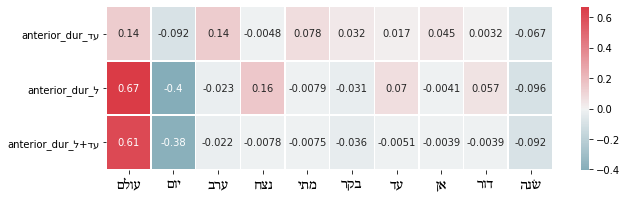

In [48]:
fig, ax = plt.subplots(figsize=(10, 3))
heatmap(andurhead_dptop_plot.T, square=False, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), size=14, fontfamily='SBL Biblit')
out.plot(
    'heat_antdur_heads'
)

# Automatically Export Head Associations and Counts